In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting in Pandas: The `df.plot()` method ([Docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot))

**Note:** The .plot() method can also be called on a Series object.

<u>Function Parameters</u>

 - ``data :`` Series or DataFrame. The object for which the method is called.
 - ``x :`` label or position, default None. Only used if data is a DataFrame.
 - ``y :`` label, position or list of label, positions, default None. Allows plotting of one column versus another. Only used if data is a DataFrame.
 - ``kind :`` str. The kind of plot to produce:
    <i>
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)
    </i>
    
 - `` ax :`` An axes of the current figure that will be used for plotting.
 - ``subplots :`` Whether to group columns into subplots:
     - *False* : No subplots will be used
     - *True* : Make separate subplots for each column.
     - sequence of iterables of column labels: Create a subplot for each group of columns. For example *[('a', 'c'), ('b', 'd')]* will create 2 subplots: one with columns 'a' and 'c', and one with columns 'b' and 'd'. Remaining columns that aren't specified will be plotted in additional subplots (one per column).
 - ``figsize :`` a tuple of (width, height) in inches
 - ``title :`` str or list. Title to use for the plot. If a string is passed, print the string at the top of the figure. If a list is passed and *subplots* is True, print each item in the list above the corresponding subplot.
 - ``stacked :`` bool, default False in line and bar plots, and True in area plot. If True, create stacked plot.
 - ``use_index :`` Use index as ticks for x axis.
 - Some of the other arguments that can be passed to the function are, ``sharex, sharey, layout, grid, legend, style, logx, logy, loglog, xticks, yticks, rot, fontsize, xlim, ylim, xlabel, ylabel, colormap, colorbar, xerr, yerr`` etc.
 - ``**kwargs :`` Options to pass to matplotlib plotting method.

#### `->` Notes

- `df.plot()` is suitable for quick and simple plots, especially when working with small to medium-sized datasets and when you want a straightforward, integrated solution. On the other hand, `seaborn` provides more flexibility, advanced plotting options, and aesthetics for more complex and customized visualizations. If you want a quick and dirty simply plot you may use `df.plot()` but if you require more options use `seaborn` instead.
- Another thing that we can use `df.plot()` for over `seaborn` is for plotting `stacked area plots and stacked bar plots`.

In [2]:
df_tips = sns.load_dataset("tips")

In [3]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# if we assume that the total_bill column inclueds the tip
df_tips["total_bill_without_tip"] = df_tips["total_bill"] - df_tips["tip"]

In [5]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_without_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


- `Plotting stacked bar plot with Pandas`

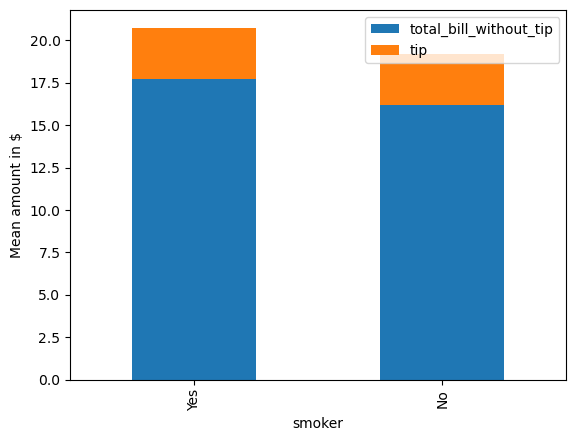

In [9]:
df_tips_plot = (
    df_tips.groupby("smoker")
    .agg({"total_bill_without_tip": "mean", "tip": "mean"})
    .reset_index()
)
df_tips_plot.plot(
    kind="bar",
    x="smoker",
    y=["total_bill_without_tip", "tip"],
    stacked=True,
    ylabel="Mean amount in $",
)

plt.show()

- `Plotting stacked bar plot with Seaborn`

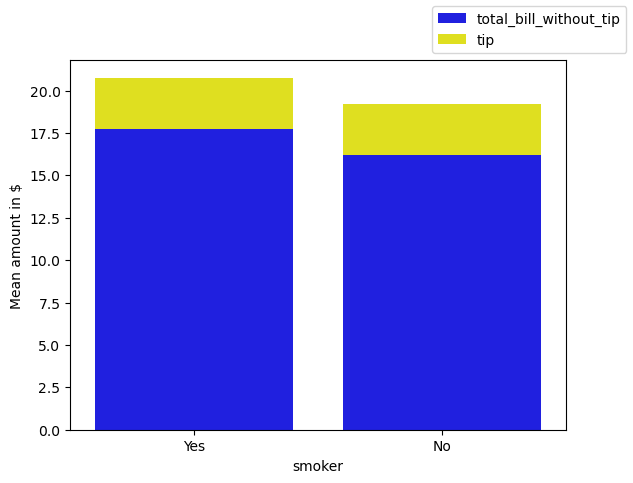

In [8]:
fig, ax = plt.subplots(1, 1)

sns.barplot(
    data=df_tips,
    x="smoker",
    y="total_bill_without_tip",
    ax=ax,
    errorbar=None,
    color="blue",
)
sns.barplot(
    data=df_tips,
    x="smoker",
    y="tip",
    bottom=df_tips.groupby("smoker").total_bill_without_tip.agg("mean"),
    ax=ax,
    errorbar=None,
    color="yellow",
)

ax.set(ylabel="Mean amount in $")
fig.legend(labels=["total_bill_without_tip", "tip"])

plt.show()

##### Well, Pick your poison!